## Go back and add data loading part here! ##

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [1]:
# Load in the data saved previously in the "Data Loading" notebook #
# Elements are [X_trainraw, y_trainraw, X_testraw, y_testraw, terrain_labels].
import pickle

with open('data/dataframes_raw_20181023.pkl', 'rb') as picklefile: 
    raw_data = pickle.load(picklefile)

X_trainraw = raw_data[0]; y_trainraw = raw_data[1]
X_testraw = raw_data[2]; y_testraw = raw_data[3]
terrain_labels = raw_data[4]

In [14]:
# Import utility functions in ClassAnalysis (with option to reload when necessary)
import ClassAnalysis
import importlib
importlib.reload(ClassAnalysis)
from ClassAnalysis import row2grid

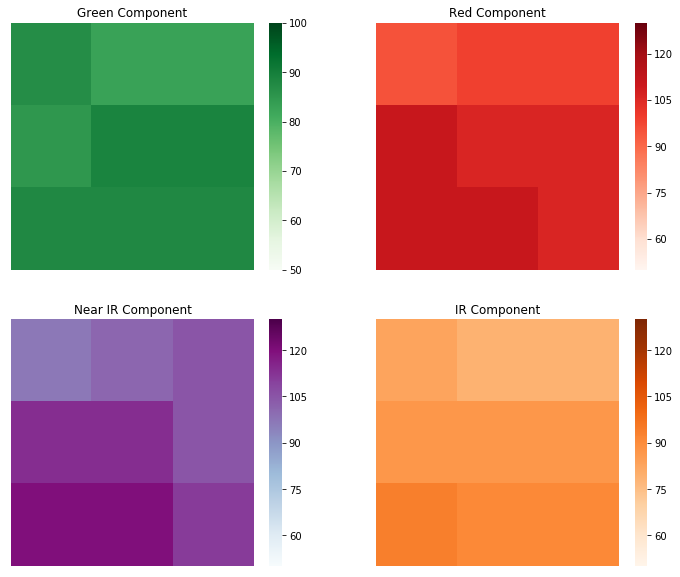

In [16]:
gridfig = row2grid(X_trainraw.iloc[300,:])
gridfig.savefig('supporting_files/SpectralGrid.png',dpi=300)

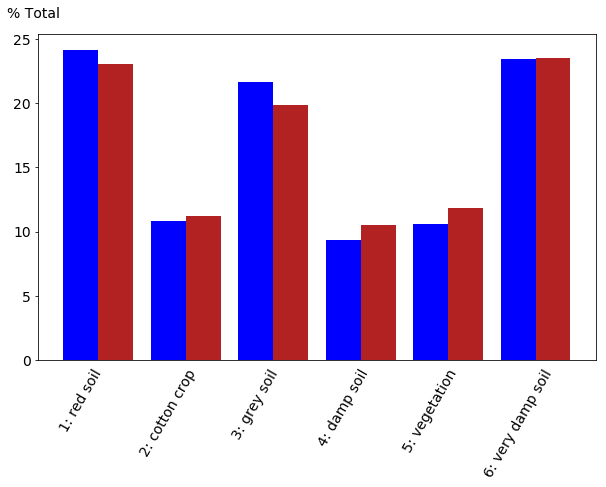

In [39]:
# Look at the general distribution of data features and labeled classes #
# It looks like the class distributions are about the same for the test and training
# sets, as downloaded from the UC Irvine database. So we'll use these as is. Also,
# the distribution across classes are moderately unbalanced.
labeltrain_counts = y_trainraw.value_counts()
labeltrain_pct = 100 * labeltrain_counts / labeltrain_counts.sum()
labeltest_counts = y_testraw.value_counts()
labeltest_pct = 100 * labeltest_counts / labeltest_counts.sum()

bar_labels = [(str(x) +': ' + terrain_labels[x]) for x in labeltrain_counts.index]
plt.bar(labeltrain_counts.index-0.2, labeltrain_pct.values,
        color = 'b', align='center', width=0.4)
plt.bar(labeltest_counts.index+0.2, labeltest_pct.values,
        color = np.array([178,34,34])/255, align='center', width=0.4)

ax = plt.gca(); fig = plt.gcf()
ax.set_xticks(labeltrain_counts.index - 0.2)
ax.set_xticklabels(bar_labels, rotation=60, fontsize=14)

ax.set_ylabel('% Total', fontsize=14, rotation = 0, ha='right')
ax.yaxis.set_label_coords(0.04,1.04)
ax.set_yticklabels(list(range(0,26,5)), fontsize=14)
plt.tick_params(axis='x',bottom=False)

fig.set_figwidth(10); fig.set_figheight(6)
fig.savefig('supporting_files/ClassDistr.png',dpi=300)

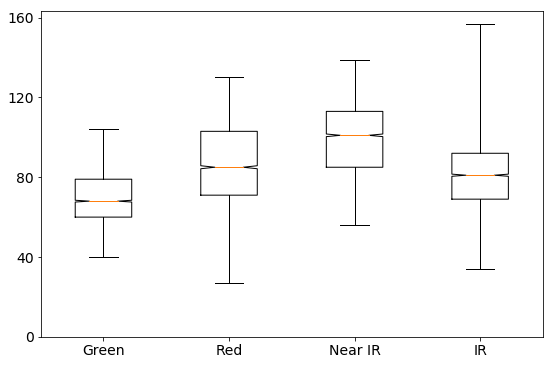

In [44]:
# Look at the average magnitudes, across data points, for each of the spectral bands #
sa_idx = list(range(1,34,4))   # first, get column indexes at all pixels for each component
sb_idx = list(range(2,37,4))
sc_idx = list(range(3,37,4))
sd_idx = list(range(4,37,4))
sa_mean = X_trainraw.iloc[:,sa_idx].mean(axis=1)
sb_mean = X_trainraw.iloc[:,sb_idx].mean(axis=1)
sc_mean = X_trainraw.iloc[:,sc_idx].mean(axis=1)
sd_mean = X_trainraw.iloc[:,sd_idx].mean(axis=1)

sa_idx = 17                    # in this version, just grab center pixel's components
sb_idx = 18
sc_idx = 19
sd_idx = 20
sa_mean = X_trainraw.iloc[:,sa_idx]
sb_mean = X_trainraw.iloc[:,sb_idx]
sc_mean = X_trainraw.iloc[:,sc_idx]
sd_mean = X_trainraw.iloc[:,sd_idx]

plt.boxplot([sa_mean, sb_mean, sc_mean, sd_mean], notch=True, whis=10);
plt.xticks(np.arange(1,5), ['Green','Red','Near IR','IR'], fontsize=14);
plt.yticks(np.arange(0,161,40), fontsize=14)

ax = plt.gca(); fig = plt.gcf()
fig.set_figwidth(9); fig.set_figheight(6)
fig.savefig('supporting_files/SpectralDistr.png', dpi=300)

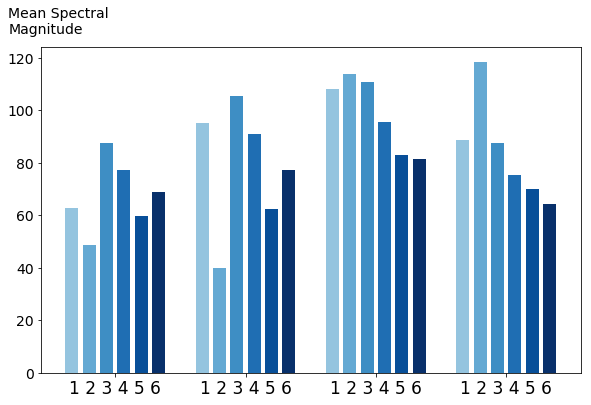

In [63]:
# Display mean spectral components of each of the 6 terrain types #
df_temp = pd.DataFrame({'a':sa_mean,'b':sb_mean,'c':sc_mean,'d':sd_mean,'Labels':y_trainraw})
df_classavg = df_temp.groupby('Labels').mean()

colorvec = cm.Blues(np.linspace(.4,1,6))
bins = np.arange(-1,1.1,.4) + 0
plt.bar(bins, df_classavg['a'], .3, align='center', color = colorvec);
bins = np.arange(-1,1.1,.4) + 3
plt.bar(bins, df_classavg['b'], .3, align='center', color = colorvec);
bins = np.arange(-1,1.1,.4) + 6
plt.bar(bins, df_classavg['c'], .3, align='center', color = colorvec);
bins = np.arange(-1,1.1,.4) + 9
plt.bar(bins, df_classavg['d'], .3, align='center', color = colorvec);

plt.xticks([0,3,6,9], ['1 2 3 4 5 6','1 2 3 4 5 6',
                       '1 2 3 4 5 6','1 2 3 4 5 6'],
                        fontsize=17);
plt.yticks(fontsize=14)

ax = plt.gca(); fig = plt.gcf()
ax.set_ylabel('Mean Spectral\nMagnitude', fontsize=14, rotation = 0, ha='left')
ax.yaxis.set_label_coords(-0.06,1.03)

fig.set_figwidth(10); fig.set_figheight(6)
fig.subplots_adjust(left=0.15)
fig.savefig('supporting_files/ClassSpectra.png', dpi=300)

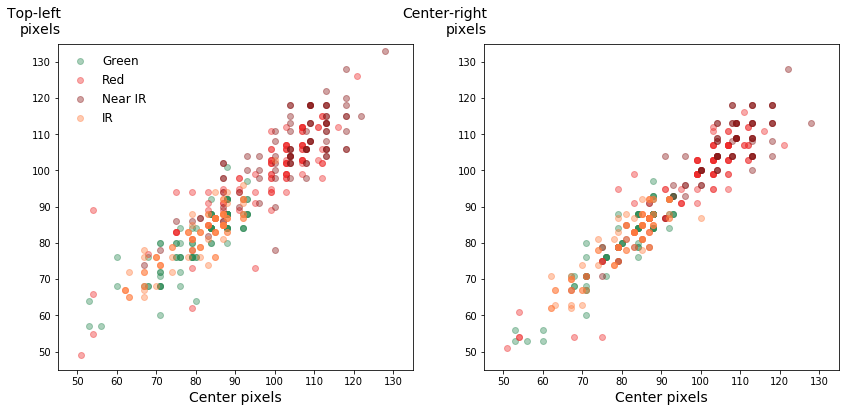

In [94]:
# Look at correlations between pixels locations on the 9x9 grids #
P1 = np.arange(17,21)   # center pixel
P2 = np.arange(1,5)     # top-left pixel (for example)
P3 = np.arange(21,25)   # center-right pixel (for example)

NPTS = 100              # only plot a subset of data points
colorvec = [np.array([46,139,87])/255, np.array([238,44,44])/255,
            np.array([139,26,26])/255, np.array([255,125,64])/255]

fig, axset = plt.subplots(1, 2, figsize=[10,4])

for i, pts in enumerate(zip(P1,P2,P3)):
    s1_pts = X_trainraw.iloc[:,pts[0]].values.ravel()
    s2_pts = X_trainraw.iloc[:,pts[1]].values.ravel()
    s3_pts = X_trainraw.iloc[:,pts[2]].values.ravel()
    
    axset[0].scatter(s1_pts[:NPTS], s2_pts[:NPTS], c=colorvec[i], alpha=.4);
    axset[1].scatter(s1_pts[:NPTS], s3_pts[:NPTS], c=colorvec[i], alpha=.4);

ylim1, ylim2 = axset[0].get_ylim()

axset[0].set_xlim([45,135]); axset[1].set_xlim([45,135])
axset[0].set_ylim([45,135]); axset[1].set_ylim([45,135])
axset[0].set_xticks(np.arange(50,131,10))
axset[1].set_xticks(np.arange(50,131,10))
axset[0].set_yticks(np.arange(50,131,10))
axset[1].set_yticks(np.arange(50,131,10))

axset[0].set_xlabel('Center pixels', fontsize=14);
axset[1].set_xlabel('Center pixels', fontsize=14);
axset[0].set_ylabel('Top-left\npixels', fontsize=14, rotation=0, ha='right');
axset[1].set_ylabel('Center-right\npixels', fontsize=14, rotation=0, ha='right');
axset[0].yaxis.set_label_coords(0.01,1.02)
axset[1].yaxis.set_label_coords(0.01,1.02)

# axset[0].set_title('Spectral magnitudes at two grid locations')
# axset[1].set_title('Spectral magnitudes at two grid locations')
axset[0].legend(['Green','Red','Near IR','IR'], fontsize=12, frameon=False);

fig = plt.gcf()
fig.set_figwidth(14); fig.set_figheight(6)
fig.savefig('supporting_files/PixelCorrelation.png', dpi=300)